#### Final Report: Russian Troll Tweets
In 2018 the analytical website [FiveThirtyEight](https://fivethirtyeight.com/) published an article detailing a indictment filed by the Justice Department against 13 Russian nationals who worked for a well-established "troll farm" base in St. Petersburg, Russia. The troll farm, know as the Internet Research Agency, ran a coordinated campaign to sew disinformation into American politics. As part of the indictment almost 3 million twitter acounts associated with the Russian agency were collected which FiveThirtyEight has pubished to a public [GitHub](https://github.com/fivethirtyeight/russian-troll-tweets) repository. This report will take one of the data sets an analyze its contents in hope of answering the following questions:

1.   What was the most followed account category and what were the top 10 hashtags for that category?

2.   What are the top publish dates with the most activity in the US? What happened on some of those dates?

3. What are the top tweets that talk about one of the events above?

In [138]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [151]:
dtypes = {'author': 'str', 'tweet_id': 'int', 'region': 'str', 'language': 'str', 'publish_date': 'str', 'harvested_date': 'str', 'following': 'int', 'followers': 'int',
'updates': 'int', 'account_type': 'str', 'account_category': 'str', 'content': 'str', 'post_type': 'str'}
tweets = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/russian-troll-tweets/master/IRAhandle_tweets_5.csv", dtype=dtypes)
tweets = tweets.drop(columns=['retweet', 'new_june_2018', 'alt_external_id', 'external_author_id', 'article_url', 'tco1_step1', 'tco2_step1', 'tco3_step1'])
tweets['publish_date'] = pd.to_datetime(tweets['publish_date'])
tweets['harvested_date'] = pd.to_datetime(tweets['harvested_date'])
tweets.set_index(['author', 'tweet_id'], inplace=True)
tweets.head()

content  \
author      tweet_id                                                                
ERRIVVVVERS 826515291907772416  #ATLCollegeFair + #ATLFair FEB 25TH  - GO KART...   
            826546180171657218  We must all go to our local federal building o...   
            826576920947064832  Some of you are acting like this shit has been...   
            826576966367186944  Track Sammy Porter on Bandsintown for local co...   
            826269123059539968  Now Playing: AsAP Mob ft. AsAP Ant Lil Uzi Ver...   

                                       region language        publish_date  \
author      tweet_id                                                         
ERRIVVVVERS 826515291907772416  United States  English 2017-01-31 19:39:00   
            826546180171657218  United States  English 2017-01-31 21:42:00   
            826576920947064832  United States  English 2017-01-31 23:44:00   
            826576966367186944  United States  English 2017-01-31 23:44:00   
            826269123059539968  United States  English 2017-01-31 03:21:00   

                                    harvested_date  following  followers  \
author      tweet_id                                                       
ERRIVVVVERS 826515291907772416 2017-01-31 19:39:00        853        861   
            826546180171657218 2017-01-31 21:42:00        853        861   
            826576920947064832 2017-01-31 23:44:00        853        861   
            826576966367186944 2017-01-31 23:44:00        853        861   
            826269123059539968 2017-01-31 03:21:00        854        858   

                                updates post_type account_type  \
author      tweet_id                                             
ERRIVVVVERS 826515291907772416     3912   RETWEET         Left   
            826546180171657218     3913   RETWEET         Left   
            826576920947064832     3915   RETWEET         Left   
            826576966367186944     3916   RETWEET         Left   
            826269123059539968     3898   RETWEET         Left   

                               account_category  
author      tweet_id                             
ERRIVVVVERS 826515291907772416        LeftTroll  
            826546180171657218        LeftTroll  
            826576920947064832        LeftTroll  
            826576966367186944        LeftTroll  
            826269123059539968        LeftTroll

#### Question One
First we will plot the popularity for each account category in terms of the number of followers

In [152]:
tweets.reset_index(inplace=True)

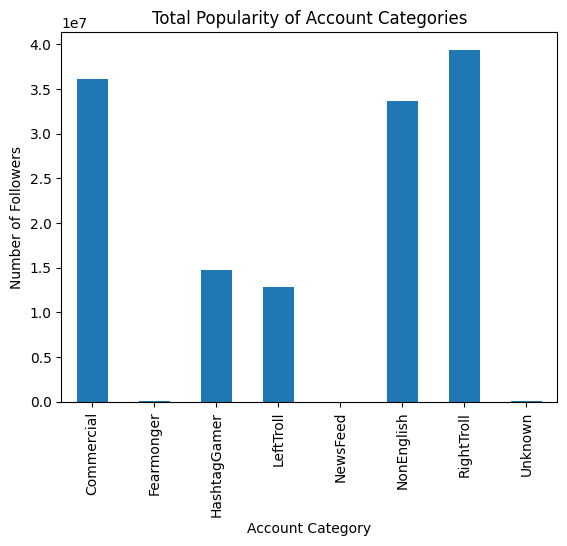

In [157]:
popularity_total = tweets.groupby('account_category')['followers'].sum()
popularity_total.plot(kind='bar', title='Total Popularity of Account Categories', xlabel='Account Category', ylabel='Number of Followers')
plt.show()

We see that twitter accounts whose content was primary right wing were the most followed accounts. Now we will look at the top 10 most common hashtags right troll acounts used. 

In [158]:
right_trolls = tweets[tweets['account_category'] == 'RightTroll']
hashtags = right_trolls['content'].str.findall(r'\#\w+')
hashtags = hashtags.explode()
top_hashtags = hashtags.groupby(hashtags).count().nlargest(10)
top_hashtags

content
#eevan         1027
#evas          1027
#tcot           910
#PJNET          901
#news           645
#MAGA           604
#2A             332
#ccot           315
#IslamKills     266
#Trump          258
Name: content, dtype: int64

Here we see hashtags that would be apparent on accounts that skew toward the right such as #IslamKills, #2A (Second Amendment), #MAGA, and #tco (Top Conservatives on Twitter).

#### Question 2
Now lets plot tweet activity over time to find the most active dates.

In [159]:
tweets.reset_index(inplace=True)

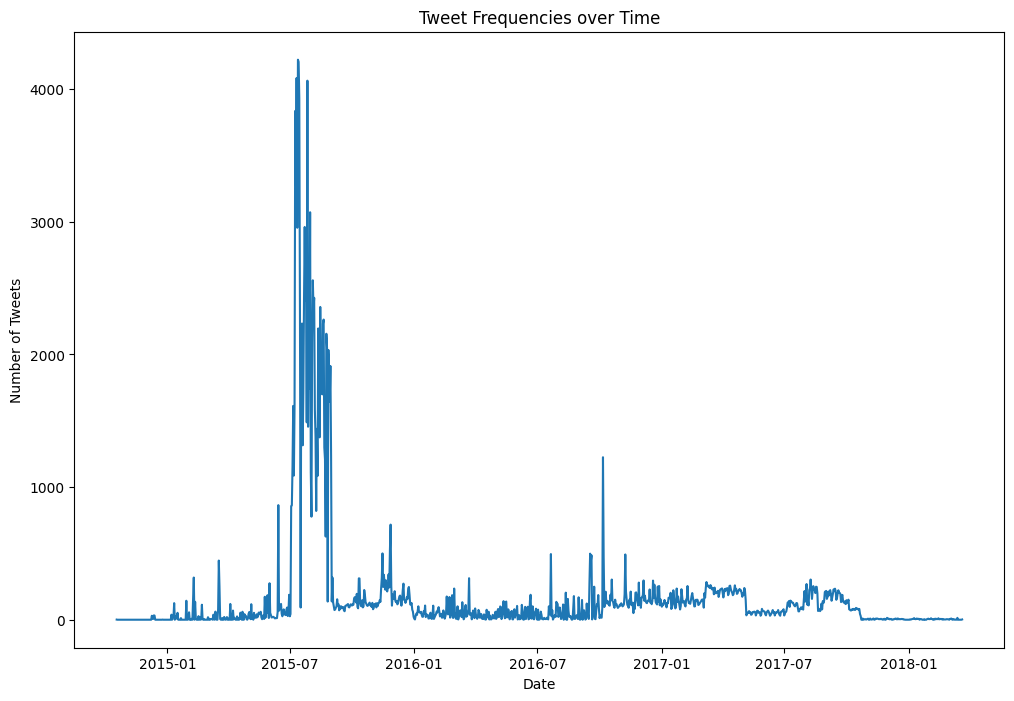

In [160]:
tweets['publish_date'] = pd.to_datetime(tweets['publish_date'])
tweets.set_index('publish_date', inplace=True)
tweet_freq = tweets.resample('D').count()
plt.figure(figsize=(12, 8))
plt.plot(tweet_freq.index, tweet_freq['content'])
plt.title('Tweet Frequencies over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

From the graph we see a significant spike in ativity starting around July of 2015. Lets expand on this to get the top 10 most active dates.

In [161]:
top_dates = tweet_freq.nlargest(5, 'content').sort_values(by='content', ascending=False).index
pd.DataFrame(top_dates)

,publish_date
0,2015-07-13
1,2015-07-14
2,2015-07-11
3,2015-07-27
4,2015-07-15


Consulting this [WikiPedia](https://https://en.wikipedia.org/wiki/2015_in_the_United_States) we see many events on the dates listed that would trigger an increase in the activity of these troll accouunts. For example:

*   July 13: "Sandra Bland, an African-American woman who had been arrested on July 10 following a minor traffic violation in Waller County, Texas, is found dead in her jail cell."
*   July 14: "Iran and a coalition including the United States come to an agreement on the nuclear program of Iran after numerous months of debate".
*   July 14: "The anti-abortion Center for Medical Progress releases the first of several undercover videos allegedly showing the negotiation of illegal selling of aborted fetal tissue by employees of Planned Parenthood. The videos trigger a strong months-long debate, and their validity is questioned."
*   July 14: "President Barack Obama calls for a reconsideration of the use of solitary confinement in American prisons, and for voting rights for released criminals."

Certainly events like these would trigger increase in activity by these troll accounts. Now we will find tweets that talk about the Iran deal.









#### Question 3
Now we will extract the top tweets for RightTroll and LeftTroll accounts that mention Iran.

In [162]:
tweets.reset_index(inplace=True)


In [163]:
us_tweets = tweets[(tweets['region'] == 'United States') & (tweets['language'] == 'English')]

right_trolls = us_tweets[(us_tweets['account_category'] == 'RightTroll')]
left_trolls = us_tweets[us_tweets['account_category'] == 'LeftTroll']

#right_trolls = right_trolls[right_trolls['content'].str.contains(r'\b(Center for Medical Progress|CMP|Planned Parenthood|abortion)\b')]
#left_trolls = left_trolls[left_trolls['content'].str.contains(r'\b(Center for Medical Progress|CMP|Planned Parenthood|abortion)\b')]
right_trolls = right_trolls[right_trolls['content'].str.contains(r'\b(Iran|Iran Deal|Iran Nuclear Weapons)\b')]
left_trolls = left_trolls[left_trolls['content'].str.contains(r'\b(Iran|Iran Deal|Iran Nuclear Weapons)\b')]

In [164]:
right_troll_top_content = right_trolls.groupby('content')['updates'].sum().sort_values(ascending=False)
pd.DataFrame(right_troll_top_content[:15])

,updates
content,
Iran deal offers faint hope for Iranian-American banking woes #business,7191
"Kerry to visit Gulf Arab states, vows to 'push back' against Iran #world #news",6799
"Kerry to visit Gulf Arab states, vows to 'push back' against Iran #news",6797
"Gen.James Mattis , 44 yrs in Marines. He stepped down in 2013 over the Iran Deal.Mattis could not Do Harm to USA He knew Obama's intentions https://t.co/TecSmCxJAl",6472
"Ever Get The Feeling a Sh** Storm is Coming? Iran, ISIS, Putin, + #Obama Himself: Open Border, Energy, Deficit, Islamification, Guns #tcot",6434
"Battle for Mosul empowers Shiite militias and Iran, paving the way for more sectarian attacks in Iraq: https://t.co/SrKBRoU4c6 #ISIS #ISIL https://t.co/1lk94NYJ2u",6058
Left unhinged b/c Flynn secretly took 35K frm RT but still No word tht Obama Secretly Gifted Iran 1.7 BILLION &amp; 21 Terrorists🤔#FridayFeeling https://t.co/XP21yA1J6s,6033
Obama WH Intentionally Hid Names Of 14 Iranians Whose Charges Were Dropped As Part His Nuke Deal w/Iran https://t.co/8vtQhw5H3a,5998
Iranian Resistance Group Reveals Iran's Nuclear Weapons Program Continues (THANKS OBAMA!) https://t.co/9tnDaK1jfY,5901


In [165]:
left_troll_top_content = left_trolls.groupby('content')['updates'].sum().sort_values(ascending=False)
pd.DataFrame(left_troll_top_content[:15])

,updates
content,
Why Iran is turning onions into jewelry https://t.co/7YnNCv13QC https://t.co/k8Cv4pbSBZ,6943
Does Trump have America on a path to war with Iran? https://t.co/iJfh1Kuccd https://t.co/OydRIyOzeU,6640
"So far, leaks have stopped: 1) Flynn, 2) An act of war vs. Iran, 3) CIA black sites re-opening, 4) An anti-LGBT E.O. https://t.co/HTvB6YVvC9",5056
"For women of Iran, I want the freedom to have their bodies kissed by the sun. #NoForcedHijab https://t.co/t7qknRyBwW",4718
Pol prisoners deprived on #hungerstrike in #Iran deprived of seeing lawyer #Iran_HungerStrike #ZEID #News #AP #AI #UN @secgen #humanrights https://t.co/OwHM9H1Flv,3031
#AP #AI #AF #News #Reuters #UNGA #Iran #FreeIran #No2Rouhani #HumanRights #UNHRC #Executions #Terrorism #Zeid #EU https://t.co/y4YxrSN3yU,3030
#AP #AI #AF #News #Reuters #UNGA #Iran #FreeIran #No2Rouhani #HumanRights #UNHRC #Executions #Terrorism #Zeid #EU https://t.co/fl0242PpYc,3029
"#London Iranian communities,& #humanrights activists protested against the increasing number of executions & public hangings in #Iran #19Nov https://t.co/vLWKaEeQXg",2322
Iran’s elections: A test of Obama’s nuclear deal https://t.co/ouTfevz3sY,2067


It is interesting to see that accounts categorized as left wing or right wing are not totally obvious. One would expect more aggressive or antagonistic language but most read like simple news tweets. Although this could a technique used to better spread disinformation by appearing professional and unbiased. 

